In [ ]:
!pip install colab_ssh --upgrade

# Asking the Token
token = input('Pls enter your Auth-Token here: ' )
password = input('Pls enter your password here: ' )

from colab_ssh import launch_ssh
launch_ssh(token, password)

import time
while True:
time.sleep(300)

Requirement already up-to-date: colab_ssh in /usr/local/lib/python3.7/dist-packages (0.3.15)
Pls enter your Auth-Token here: 1q6kmwgdRpM5Rx1TY00M2E5nzFX_XUMEME7wxn6o2fdceu8E
Pls enter your password here: root
we highly recommend that update your code by following this documentation https://github.com/WassimBenzarti/colab-ssh#getting-started
Successfully running 4.tcp.ngrok.io:11352
[Optional] You can also connect with VSCode SSH Remote extension using this configuration:

	Host google_colab_ssh
		HostName 4.tcp.ngrok.io
		User root
		Port 11352
	  


In [14]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
from google.colab import files
uploaded = files.upload()

!pwd
!ls

Saving file_churn_modelling.csv to file_churn_modelling.csv
/content
file_churn_modelling.csv  sample_data


In [63]:
# Importing the dataset
dataset = pd.read_csv('/content/file_churn_modelling.csv')
dataset


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [64]:
# Creating Features and Label column

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [65]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [66]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [33]:
len(X_train)

8000

In [67]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [68]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [69]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11))
classifier.add(Dropout(0.4))

# Adding the second hidden layer
classifier.add(Dense(units= 6, kernel_initializer = 'he_uniform',activation = 'relu'))
classifier.add(Dropout(0.4))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifier.add(Dropout(0.4))

# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Getting the model summary
classifier.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 6)                 72        
_________________________________________________________________
dropout_44 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_56 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_45 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 7         
_________________________________________________________________
dropout_46 (Dropout)         (None, 1)                 0         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_______________________________________________________

In [76]:
# Fitting the ANN to the Training set and Start Model Training 
model_history=classifier.fit(X_train, y_train, validation_split=0.28, batch_size = 8000, epochs = 500)


Epoch 1/500
1/1 [==============================] - 0s 99ms/step - loss: 1.8144 - accuracy: 0.6825 - val_loss: 0.4859 - val_accuracy: 0.7982
Epoch 2/500
1/1 [==============================] - 0s 46ms/step - loss: 1.8626 - accuracy: 0.6701 - val_loss: 0.4859 - val_accuracy: 0.7982
Epoch 3/500
1/1 [==============================] - 0s 47ms/step - loss: 1.7589 - accuracy: 0.6865 - val_loss: 0.4858 - val_accuracy: 0.7982
Epoch 4/500
1/1 [==============================] - 0s 48ms/step - loss: 1.6840 - accuracy: 0.6905 - val_loss: 0.4858 - val_accuracy: 0.7982
Epoch 5/500
1/1 [==============================] - 0s 45ms/step - loss: 1.9027 - accuracy: 0.6830 - val_loss: 0.4858 - val_accuracy: 0.7982
Epoch 6/500
1/1 [==============================] - 0s 57ms/step - loss: 1.7526 - accuracy: 0.6965 - val_loss: 0.4857 - val_accuracy: 0.7982
Epoch 7/500
1/1 [==============================] - 0s 44ms/step - loss: 1.7816 - accuracy: 0.6802 - val_loss: 0.4857 - val_accuracy: 0.7982
Epoch 8/500
1/1 [===

In [77]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy

plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


KeyError: ignored

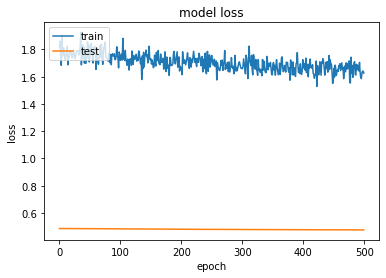

In [78]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [83]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [84]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.7975